In [ ]:
#@title
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
#@title
import requests, json
from tqdm import tqdm
from bs4 import BeautifulSoup
import urllib.parse as parse
import pandas as pd
#visualization
import matplotlib as mpl
import matplotlib.pylab as plb
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rcParams
import sklearn as sk
import seaborn as sns

# 브라우저에서 바로 그려지도록 
# %matplotlib inline

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# Seaborn 테마 설정
sns.set_theme(style="ticks", color_codes=True, font='NanumSquareRound', font_scale=2)

# Colab 의 한글 폰트 설정
# plt.rc('font', family='NanumSquareRound') 

# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

# 워닝 메세지 삭제
import warnings
warnings.filterwarnings(action='ignore')

# font_list = [font.name for font in fm.fontManager.ttflist]
# font_list

> # 시계열로 살펴본 독자 참여 변화 추이
>> ### 인기 순위를 기준으로 5개 장르에서 연재중인 작품을 각각 10개씩 선정하여 
>> ### 2021년과 2022년 1사분기의 독자 참여 변화 추이를 비교해봤습니다.
>>> #### 웹툰마다 회차 진행이 상이하여 시계열 비교 분석이 불가능해보였습니다.
>>> #### 연재 중인 웹툰의 회차를 뒤에서부터 64화 추려내 장르별로 작년 52주와 금년 12주간의 변화 양상을 비교해보고자 했습니다.

In [32]:
lastYear

,장르,제목,회차,좋아요수,평점,평점기여자수,전체댓글수,베댓공감수,베댓비공감수,참여수치합,기간,순서
0,드라마,1초,97,17863,9.98,17555,1037,115305,1088,152848,52,1
1,드라마,1초,98,18463,9.98,19214,1155,115892,691,155415,52,2
2,드라마,1초,99,17419,9.98,17939,815,72324,416,108913,52,3
3,드라마,1초,100,18290,9.97,18384,2203,94075,3524,136476,52,4
4,드라마,1초,101,14729,9.97,13885,826,72255,1649,103344,52,5
...,...,...,...,...,...,...,...,...,...,...,...,...
2595,액션,일렉시드,168,13111,9.97,11819,1030,59638,970,86568,52,48
2596,액션,일렉시드,169,13836,9.95,13650,1498,55025,673,84682,52,49
2597,액션,일렉시드,170,12938,9.97,11674,999,43506,282,69399,52,50
2598,액션,일렉시드,171,15088,9.97,14892,2564,117812,741,151097,52,51


In [28]:
lastYearPlot

,드라마,순정,스릴러,액션,판타지,종류
0,23321.3,19384.4,7414.00,16884.0,13604.18,좋아요수
1,23328.5,19522.2,7673.67,16758.4,13073.55,좋아요수
2,26332.0,19240.3,7450.44,16691.4,12992.91,좋아요수
3,23030.7,18597.7,7538.78,16429.6,12718.18,좋아요수
4,22016.4,19020.8,7620.67,16539.9,12651.91,좋아요수
...,...,...,...,...,...,...
47,136506.6,113639.3,46506.67,92974.9,58509.00,참여수치합
48,152570.4,120222.4,41168.44,75417.5,53136.73,참여수치합
49,128676.9,112774.2,36727.67,77554.7,55763.64,참여수치합
50,130364.2,90313.4,48228.22,93013.0,60030.73,참여수치합


In [2]:
#@title
lastYear = pd.read_csv('2번토픽작년52화.csv')
lastYear['참여수치합'] = lastYear['좋아요수'] + lastYear['평점기여자수'] + lastYear['전체댓글수'] + lastYear['베댓공감수'] + lastYear['베댓비공감수']

In [3]:
#@title
threeMonths = pd.read_csv('2번토픽최신12화.csv')
threeMonths['참여수치합'] = threeMonths['좋아요수'] + threeMonths['평점기여자수'] + threeMonths['전체댓글수'] + threeMonths['베댓공감수'] + threeMonths['베댓비공감수']

In [4]:
#@title
lastYear['기간'] = 52
numbers = [i for i in range(1,53)]*50
lastYear['순서'] = numbers
# display(lastYear)
threeMonths['기간'] = 12
numbers = [i for i in range(1,13)]*50
threeMonths['순서'] = numbers
# display(threeMonths)

In [5]:
#@title
df = pd.concat([lastYear, threeMonths])

In [6]:
#@title
lst= []

for i in range(1, 53):
  cond = (df['기간'] == 52) & (df['순서'] == i)
  lst.append(df[cond].groupby('장르')[['평점']].mean().round(2).transpose())
temp = pd.concat(lst).reset_index()
temp.drop('index', axis=1, inplace=True)
temp.columns.name = None

In [7]:
#@title
data = {}
lst= []
cols = ['좋아요수',	'평점',	'평점기여자수',	'전체댓글수',	'베댓공감수',	'베댓비공감수', '참여수치합']
for col in cols:
  for i in range(1, 53):
    cond = (df['기간'] == 52) & (df['순서'] == i)
    lst.append(df[cond].groupby('장르')[[col]].mean().round(2).transpose())
  data[col] = pd.concat(lst).reset_index()
  data[col].drop('index', axis=1, inplace=True)
  data[col].columns.name = None
  data[col]['종류'] = col
  lst= []

lastYearPlot = pd.concat([item for item in data.values()])
# lastYearPlot.reindex([i for i in range(1,53)])

> ## 2021년 (총 52회차)

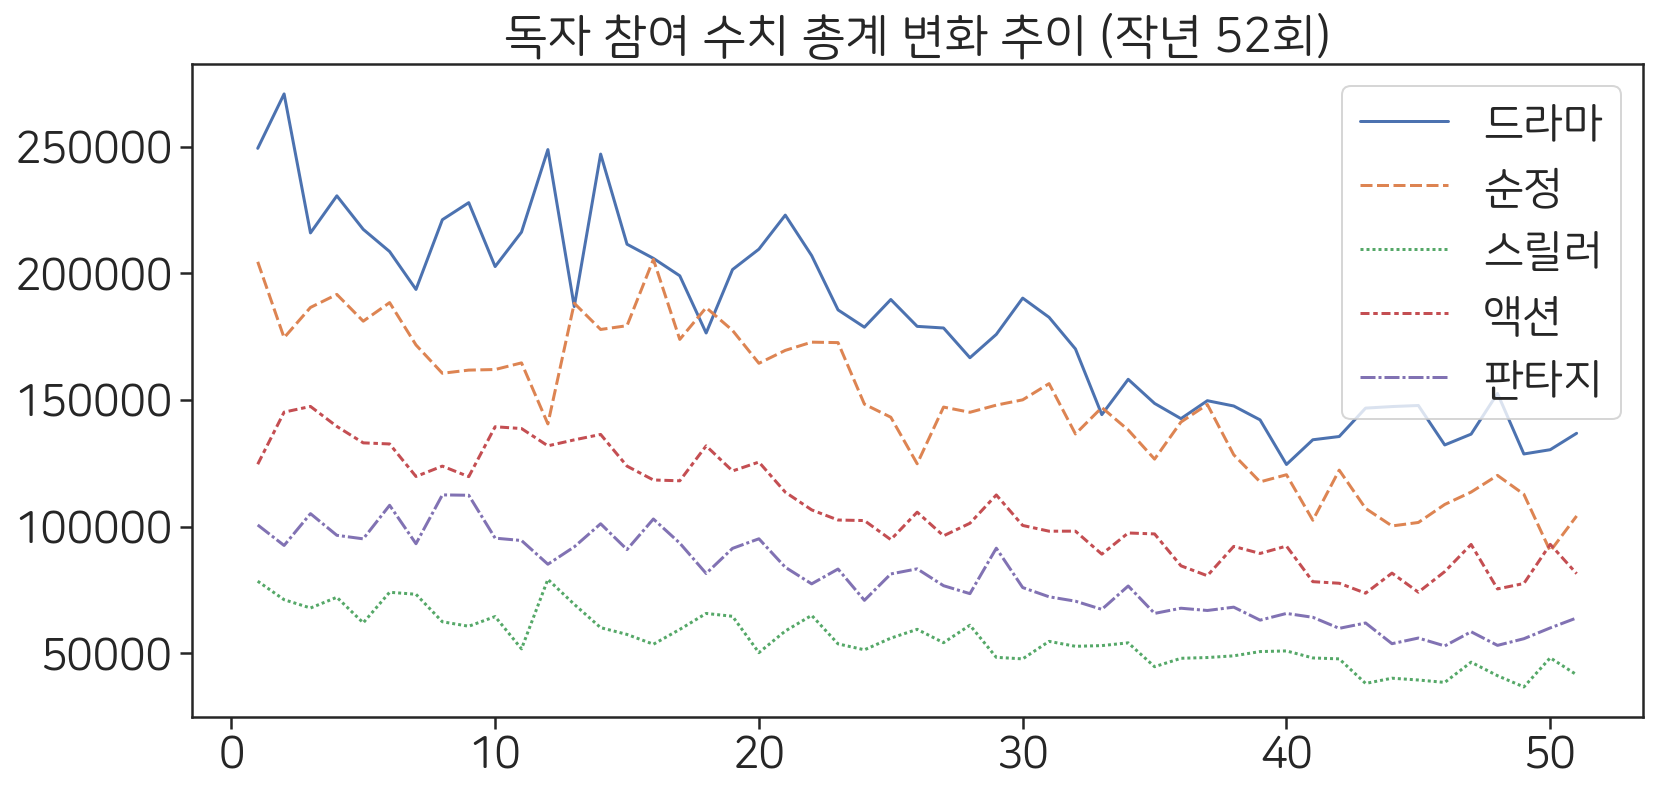

In [30]:
#@title
rcParams['figure.figsize'] = 13, 6 # 플랏 크기 조절
rcParams['font.size'] = '18' # 폰트 크기 조절
cond = lastYearPlot['종류'] == '참여수치합'
plot = lastYearPlot[cond].reindex([i for i in range(1,53)])
fig = sns.lineplot(data=plot)
plt.title("독자 참여 수치 총계 변화 추이 (작년 52회)")
plt.xlabel("")
plt.ylabel("")
print()

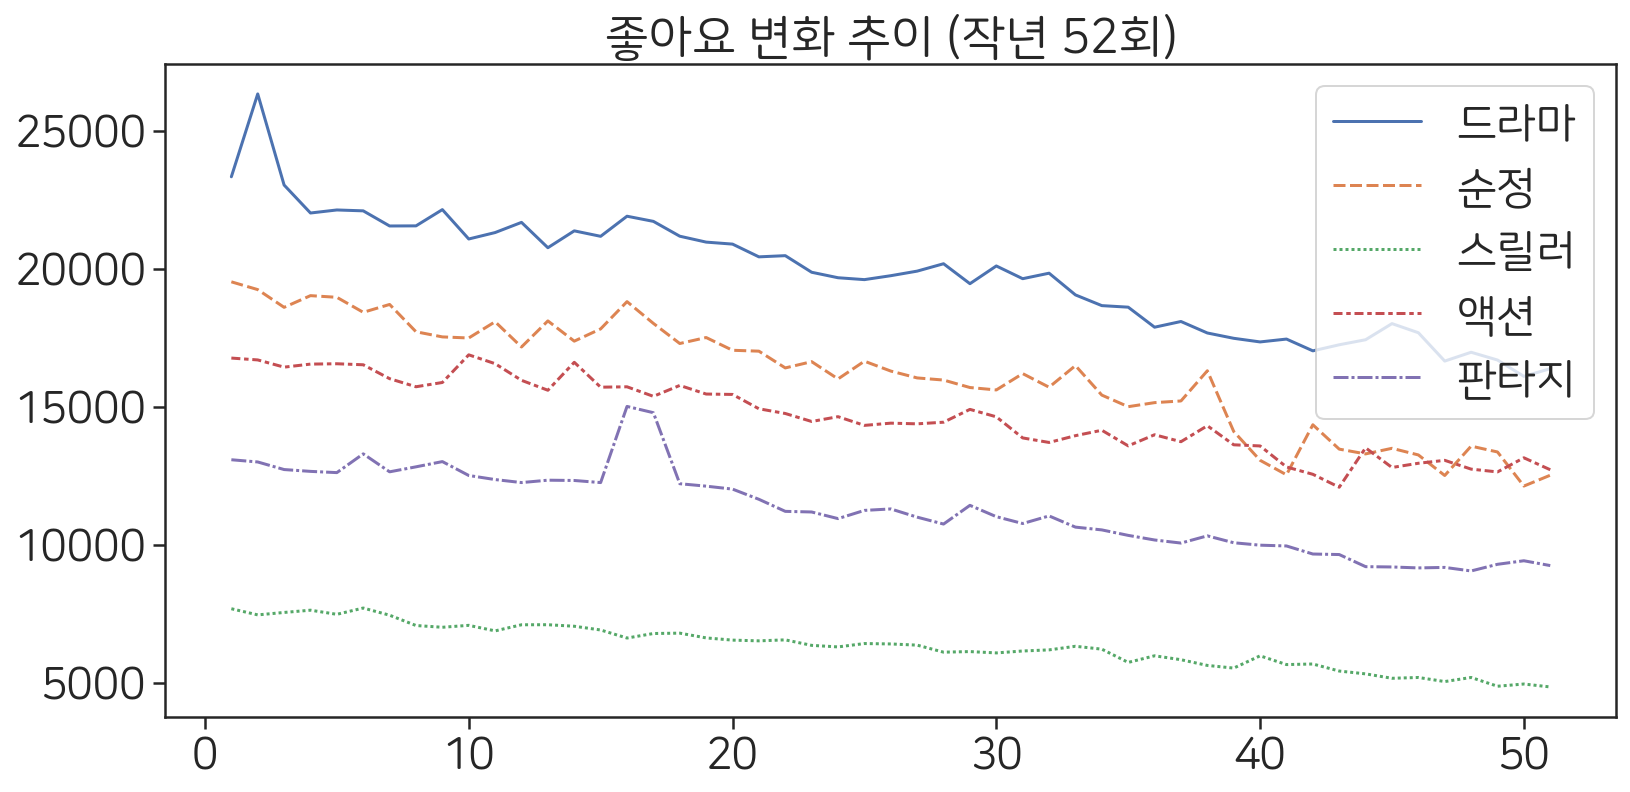

In [ ]:
#@title
rcParams['figure.figsize'] = 13, 6 # 플랏 크기 조절
rcParams['font.size'] = '18' # 폰트 크기 조절
cond = lastYearPlot['종류'] == '좋아요수'
plot = lastYearPlot[cond].reindex([i for i in range(1,53)])
fig = sns.lineplot(data=plot)
plt.title("좋아요 변화 추이 (작년 52회)")
plt.xlabel("")
plt.ylabel("")
print()

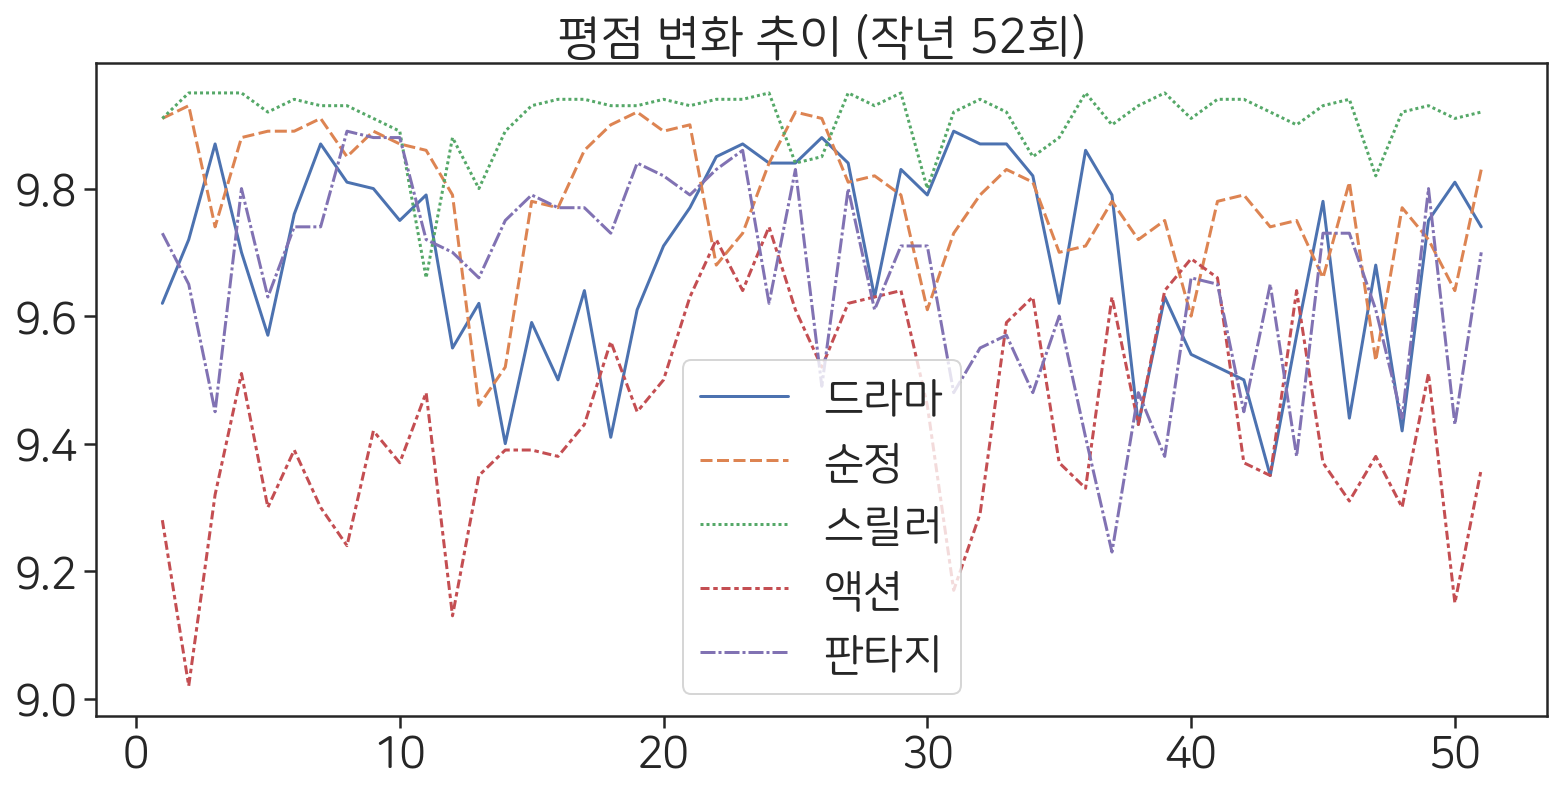

In [ ]:
#@title
rcParams['figure.figsize'] = 13, 6 # 플랏 크기 조절
rcParams['font.size'] = '18' # 폰트 크기 조절
cond = lastYearPlot['종류'] == '평점'
plot = lastYearPlot[cond].reindex([i for i in range(1,53)])
sns.lineplot(data=plot)
plt.title("평점 변화 추이 (작년 52회)")
plt.xlabel("")
plt.ylabel("")
print()

> ### 난리법석이지만 결국 9-10점대에서 일어나는 전쟁...
> ### 스릴러 장르의 평점이 꾸준한 것은 눈여겨 볼만 하다.

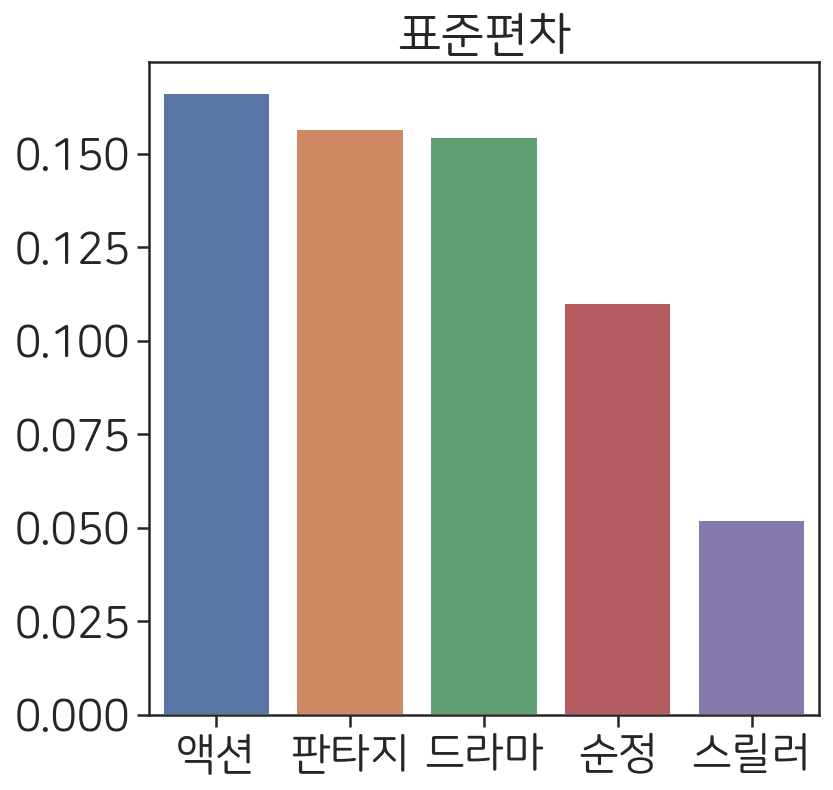

In [ ]:
#@title
rcParams['figure.figsize'] = 6, 6 # 플랏 크기 조절
rcParams['font.size'] = '18' # 폰트 크기 조절
plot = plot.std().to_frame().reset_index()
plot = plot.rename(columns={"index": "장르", 0: "표준편차"}).sort_values('표준편차', ascending=False)
fig = sns.barplot(data=plot, x=plot['장르'], y='표준편차')
plt.title("표준편차")
plt.xlabel("")
plt.ylabel("")
print()

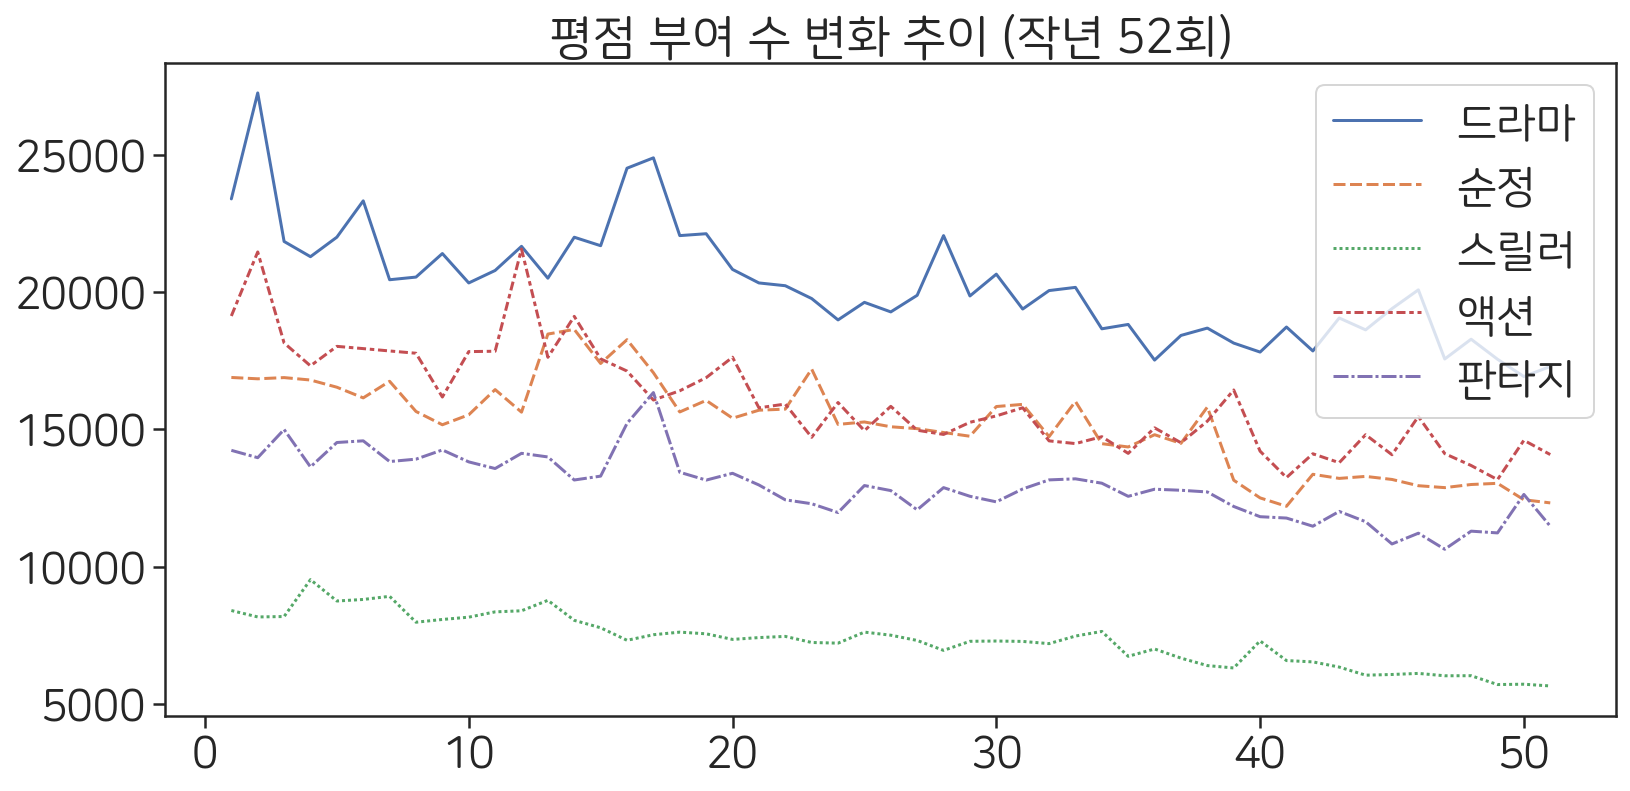

In [ ]:
#@title
rcParams['figure.figsize'] = 13, 6 # 플랏 크기 조절
rcParams['font.size'] = '18' # 폰트 크기 조절
cond = lastYearPlot['종류'] == '평점기여자수'
plot = lastYearPlot[cond].reindex([i for i in range(1,53)])
fig = sns.lineplot(data=plot)
plt.title("평점 부여 수 변화 추이 (작년 52회)")
plt.xlabel("")
plt.ylabel("")
print()

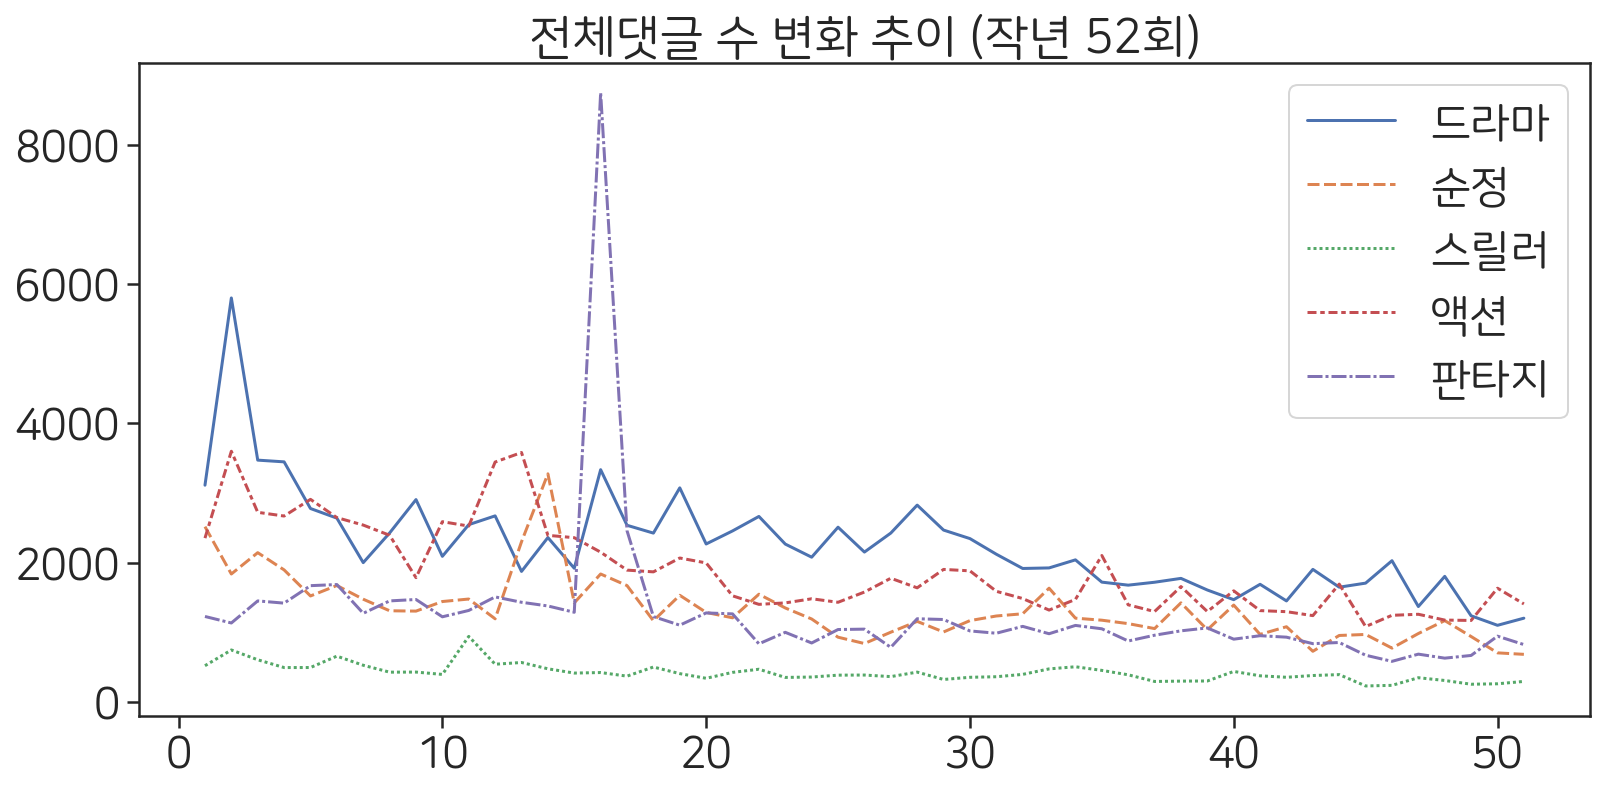

In [ ]:
#@title
rcParams['figure.figsize'] = 13, 6 # 플랏 크기 조절
rcParams['font.size'] = '18' # 폰트 크기 조절
cond = lastYearPlot['종류'] == '전체댓글수'
plot = lastYearPlot[cond].reindex([i for i in range(1,53)])
fig = sns.lineplot(data=plot)
plt.title("전체댓글 수 변화 추이 (작년 52회)")
plt.xlabel("")
plt.ylabel("")
print()

> ### 베댓 공감 수와 비공감 수의 높은 편차는 눈여겨 볼 만하다.

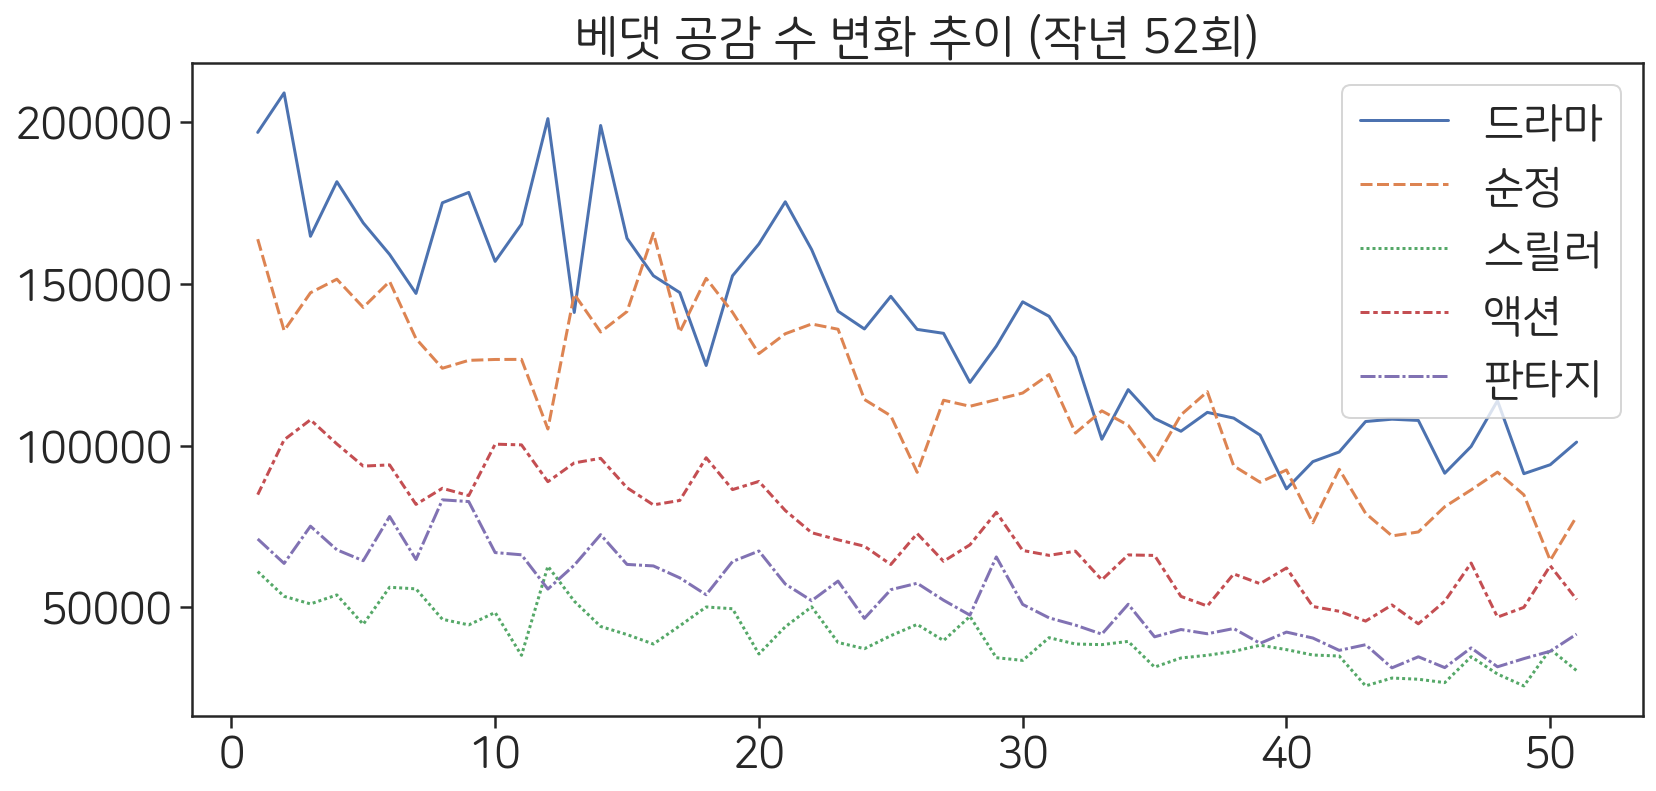

In [ ]:
#@title
rcParams['figure.figsize'] = 13, 6 # 플랏 크기 조절
rcParams['font.size'] = '18' # 폰트 크기 조절
cond = lastYearPlot['종류'] == '베댓공감수'
plot = lastYearPlot[cond].reindex([i for i in range(1,53)])
fig = sns.lineplot(data=plot)
plt.title("베댓 공감 수 변화 추이 (작년 52회)")
plt.xlabel("")
plt.ylabel("")
print()

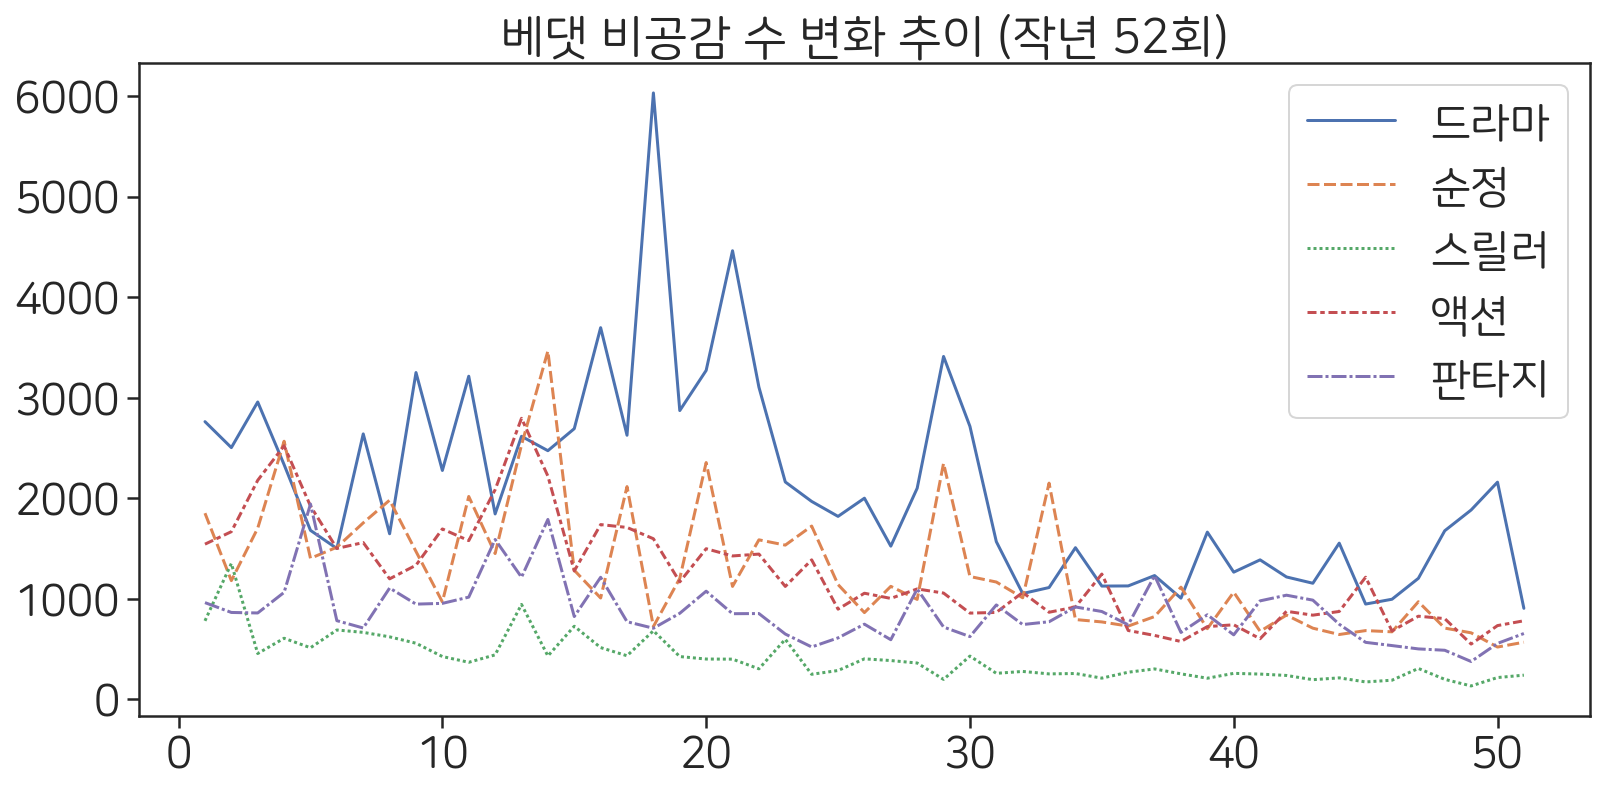

In [ ]:
#@title
rcParams['figure.figsize'] = 13, 6 # 플랏 크기 조절
rcParams['font.size'] = '18' # 폰트 크기 조절
cond = lastYearPlot['종류'] == '베댓비공감수'
plot = lastYearPlot[cond].reindex([i for i in range(1,53)])
fig = sns.lineplot(data=plot)
plt.title("베댓 비공감 수 변화 추이 (작년 52회)")
plt.xlabel("")
plt.ylabel("")
print()

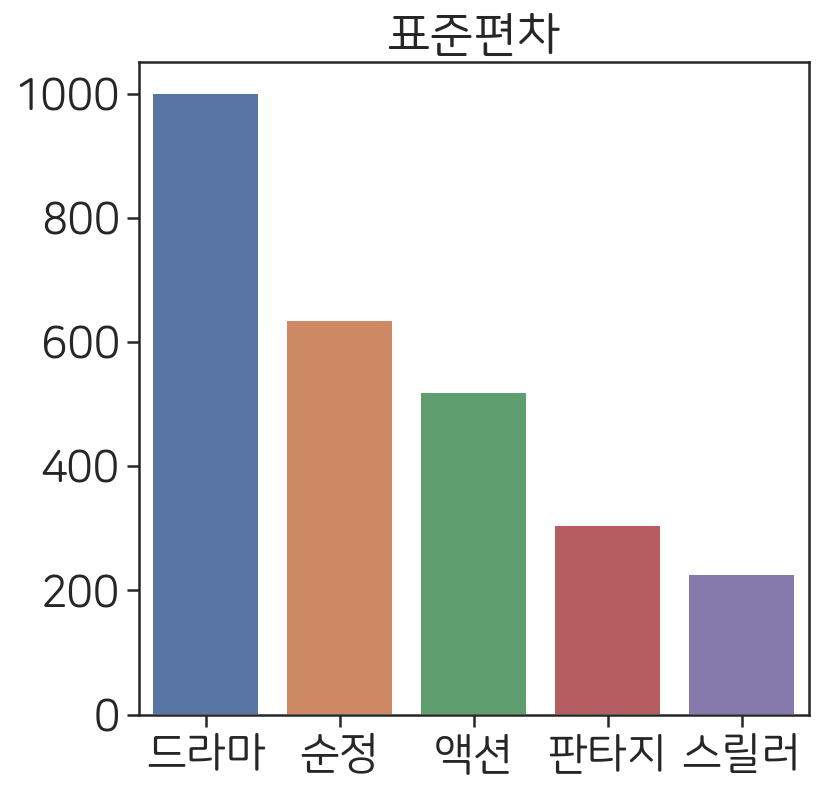

In [ ]:
#@title
rcParams['figure.figsize'] = 6, 6 # 플랏 크기 조절
rcParams['font.size'] = '18' # 폰트 크기 조절
plot = plot.std().to_frame().reset_index()
plot = plot.rename(columns={"index": "장르", 0: "표준편차"}).sort_values('표준편차', ascending=False)
fig = sns.barplot(data=plot, x=plot['장르'], y='표준편차')
plt.title("표준편차")
plt.xlabel("")
plt.ylabel("")
print()

In [11]:
#@title
data = {}
lst= []
cols = ['좋아요수',	'평점',	'평점기여자수',	'전체댓글수',	'베댓공감수',	'베댓비공감수', '참여수치합']
for col in cols:
  for i in range(1, 13):
    cond = (df['기간'] == 12) & (df['순서'] == i)
    lst.append(df[cond].groupby('장르')[[col]].mean().round(2).transpose())
  data[col] = pd.concat(lst).reset_index()
  data[col].drop('index', axis=1, inplace=True)
  data[col].columns.name = None
  data[col]['종류'] = col
  lst= []

thisYearPlot = pd.concat([item for item in data.values()])
# thisYearPlot

> ## 2022년 1사분기 (총 12회차)

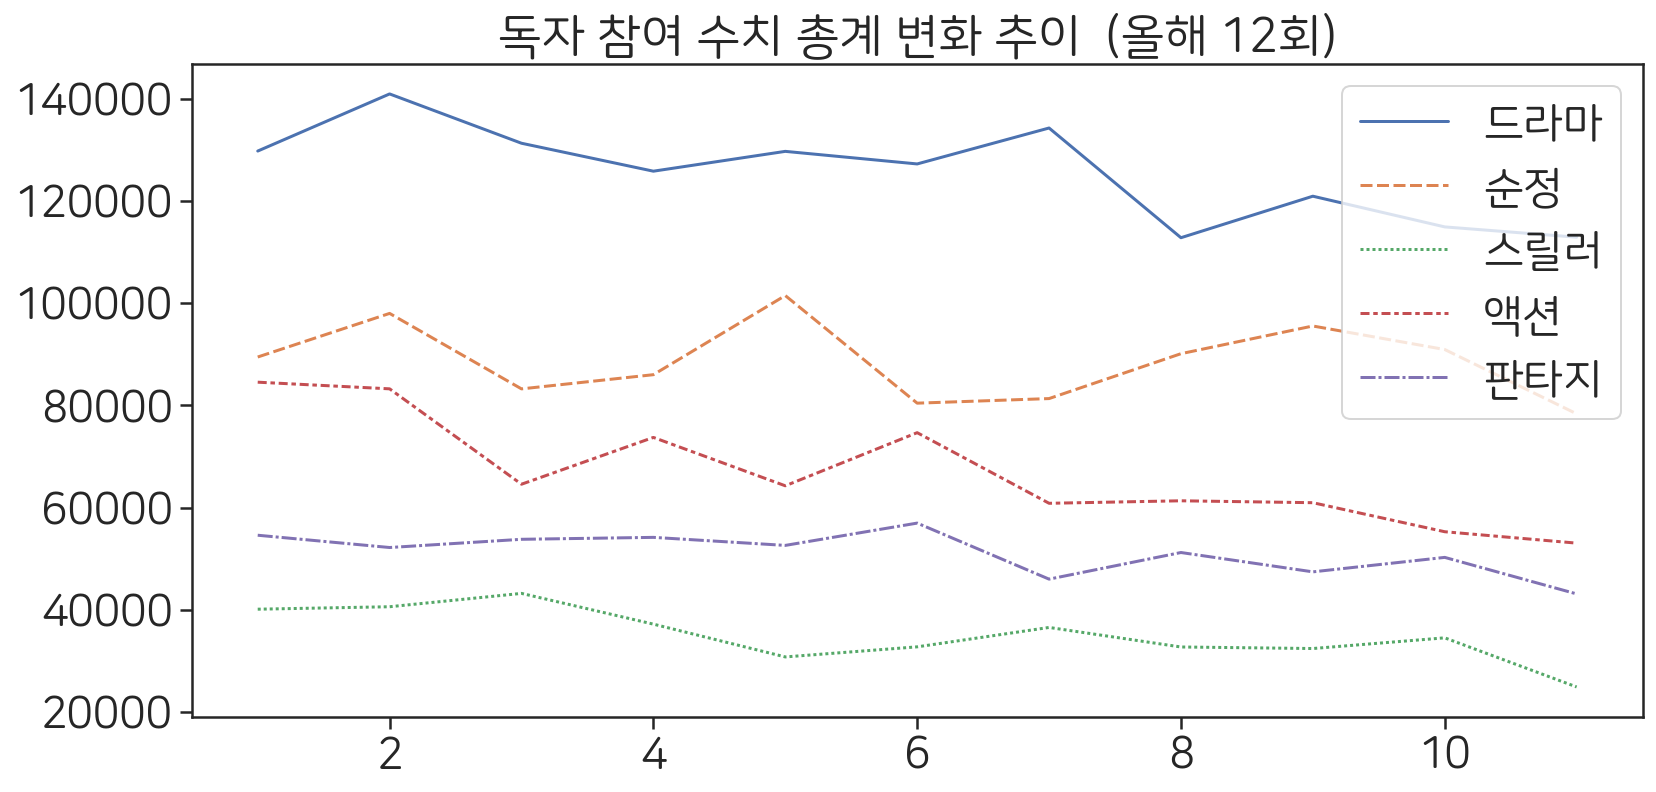

In [15]:
#@title
rcParams['figure.figsize'] = 13, 6 # 플랏 크기 조절
rcParams['font.size'] = '18' # 폰트 크기 조절
cond = thisYearPlot['종류'] == '참여수치합'
plot = thisYearPlot[cond].reindex([i for i in range(1,53)])
fig = sns.lineplot(data=plot)
plt.title("독자 참여 수치 총계 변화 추이  (올해 12회)")
plt.xlabel("")
plt.ylabel("")
print()

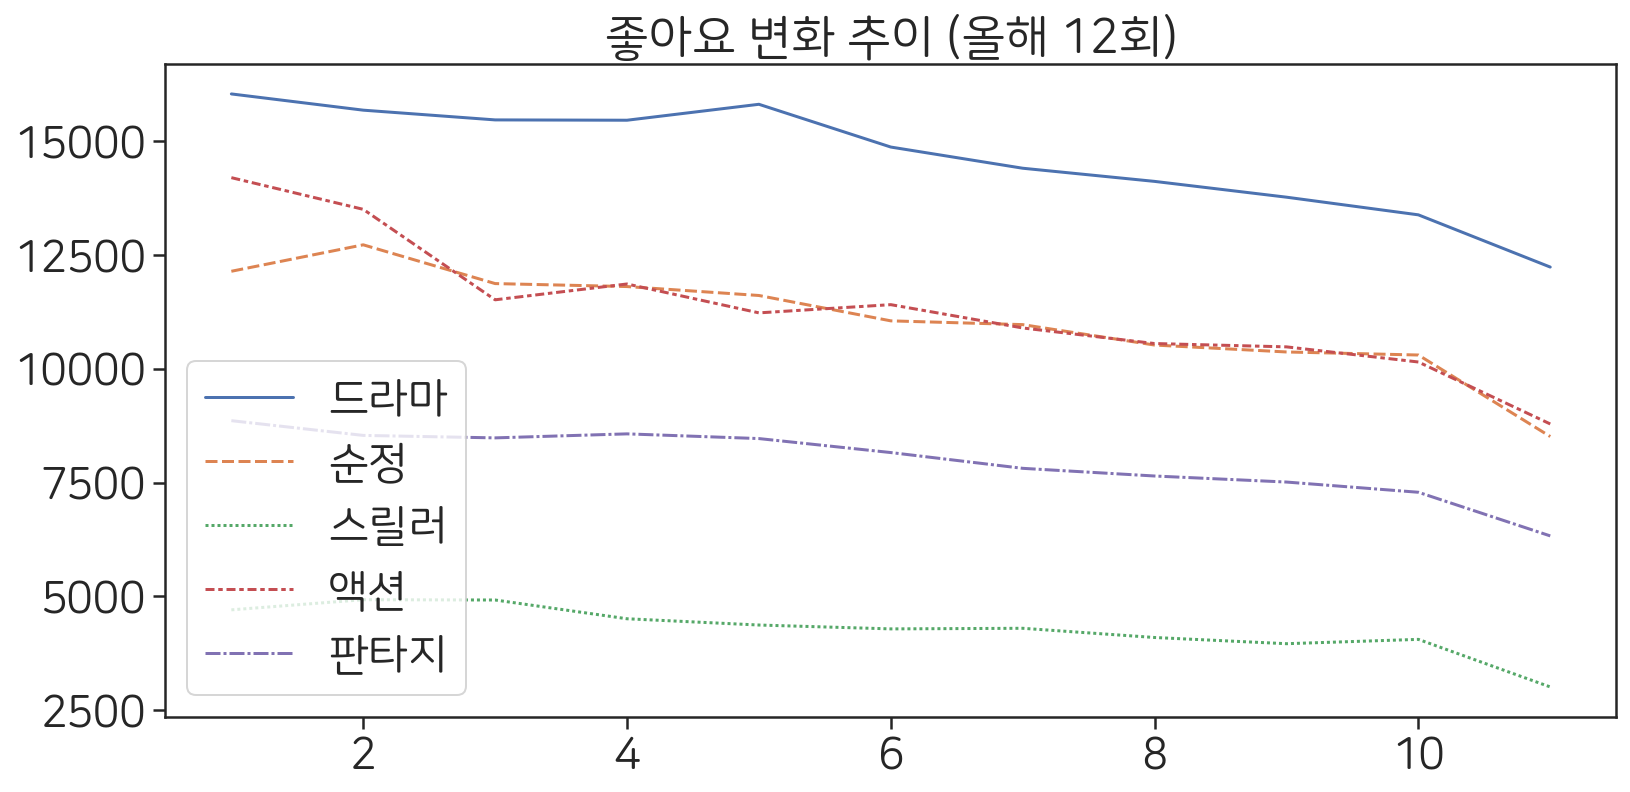

In [ ]:
#@title
rcParams['figure.figsize'] = 13, 6 # 플랏 크기 조절
rcParams['font.size'] = '18' # 폰트 크기 조절
cond = thisYearPlot['종류'] == '좋아요수'
plot = thisYearPlot[cond].reindex([i for i in range(1,53)])
fig = sns.lineplot(data=plot)
plt.title("좋아요 변화 추이 (올해 12회)")
plt.xlabel("")
plt.ylabel("")
print()

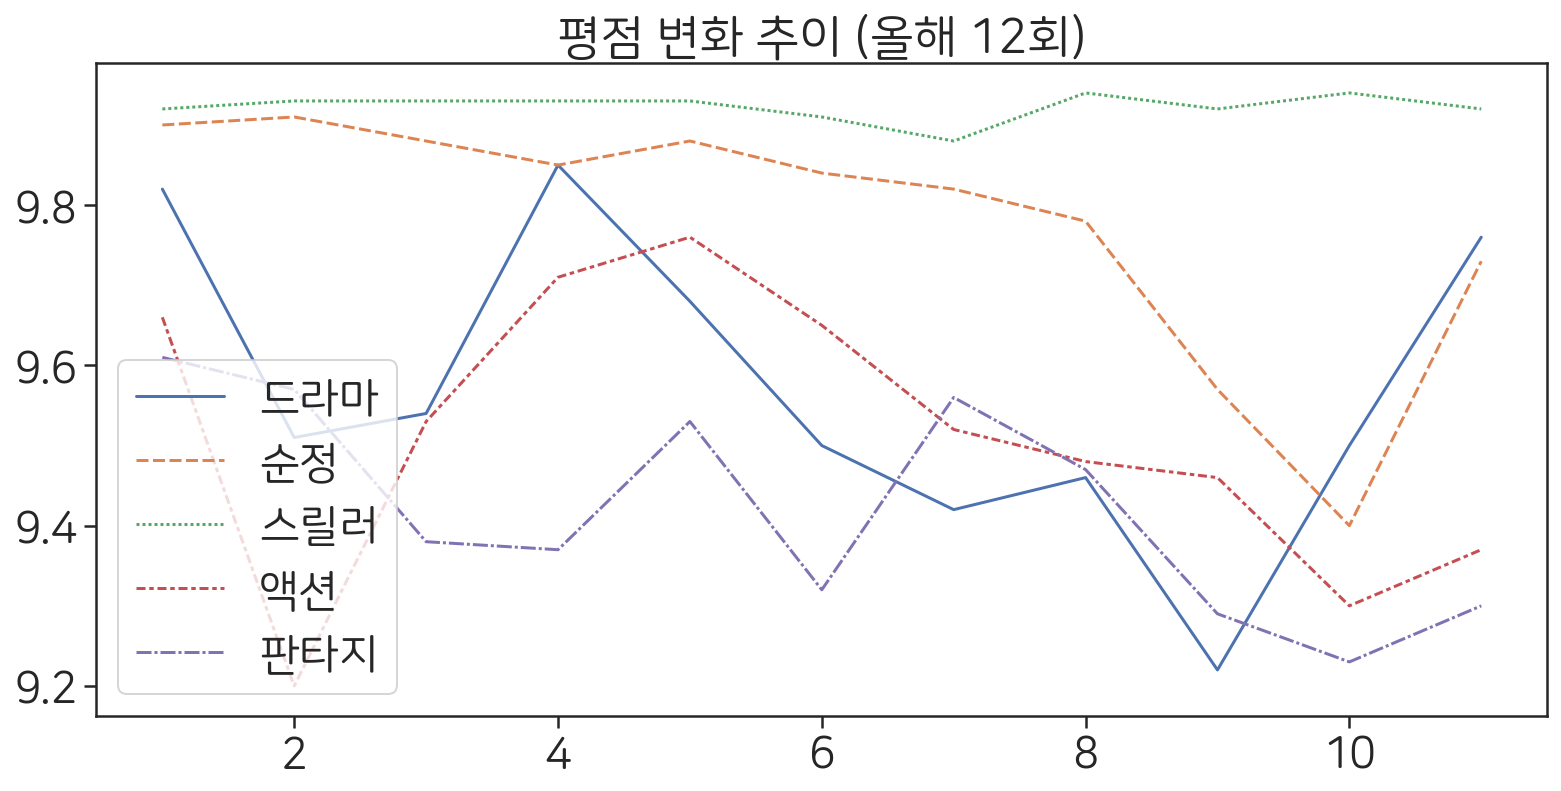

In [ ]:
#@title
rcParams['figure.figsize'] = 13, 6 # 플랏 크기 조절
rcParams['font.size'] = '18' # 폰트 크기 조절
cond = thisYearPlot['종류'] == '평점'
plot = thisYearPlot[cond].reindex([i for i in range(1,53)])
fig = sns.lineplot(data=plot)
plt.title("평점 변화 추이 (올해 12회)")
plt.xlabel("")
plt.ylabel("")
print()

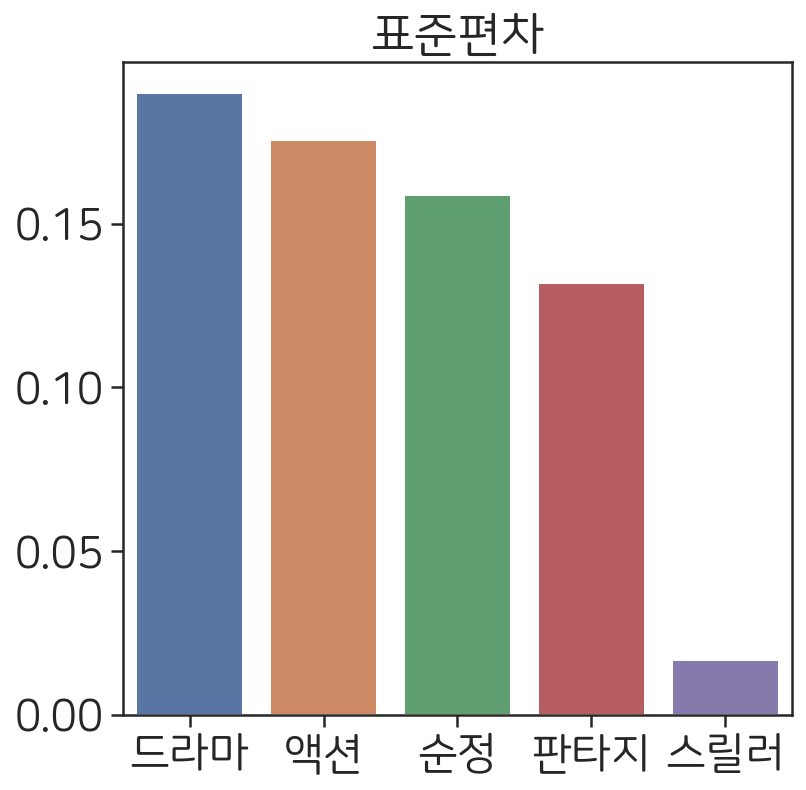

In [ ]:
#@title
rcParams['figure.figsize'] = 6, 6 # 플랏 크기 조절
rcParams['font.size'] = '18' # 폰트 크기 조절
plot = plot.std().to_frame().reset_index()
plot = plot.rename(columns={"index": "장르", 0: "표준편차"}).sort_values('표준편차', ascending=False)
fig = sns.barplot(data=plot, x=plot['장르'], y='표준편차')
plt.title("표준편차")
plt.xlabel("")
plt.ylabel("")
print()

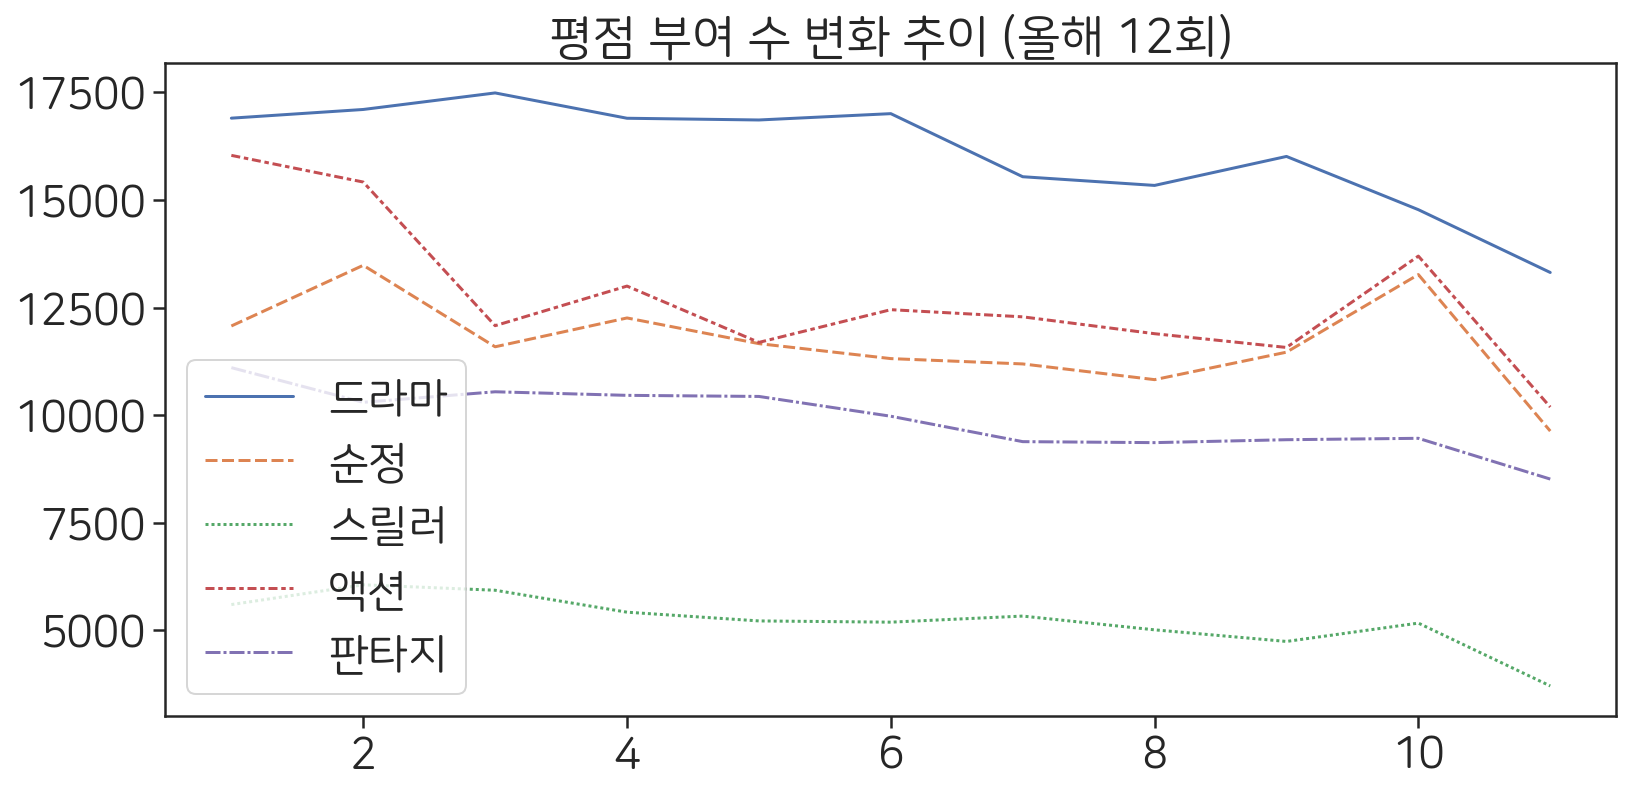

In [ ]:
#@title
rcParams['figure.figsize'] = 13, 6 # 플랏 크기 조절
rcParams['font.size'] = '18' # 폰트 크기 조절
cond = thisYearPlot['종류'] == '평점기여자수'
plot = thisYearPlot[cond].reindex([i for i in range(1,53)])
fig = sns.lineplot(data=plot)
plt.title("평점 부여 수 변화 추이 (올해 12회)")
plt.xlabel("")
plt.ylabel("")
print()

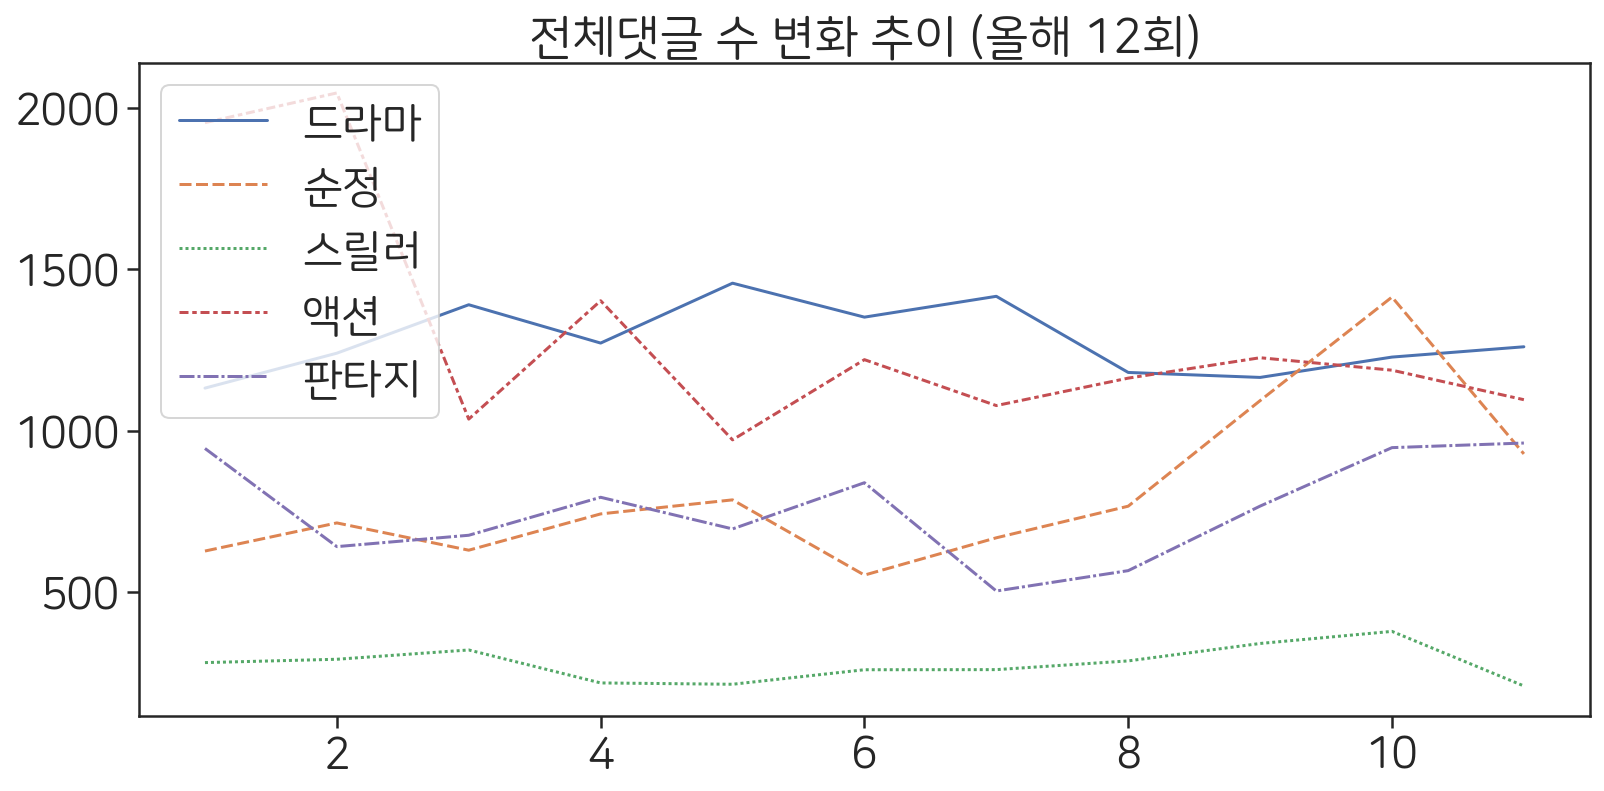

In [ ]:
#@title
rcParams['figure.figsize'] = 13, 6 # 플랏 크기 조절
rcParams['font.size'] = '18' # 폰트 크기 조절
cond = thisYearPlot['종류'] == '전체댓글수'
plot = thisYearPlot[cond].reindex([i for i in range(1,53)])
fig = sns.lineplot(data=plot)
plt.title("전체댓글 수 변화 추이 (올해 12회)")
plt.xlabel("")
plt.ylabel("")
print()

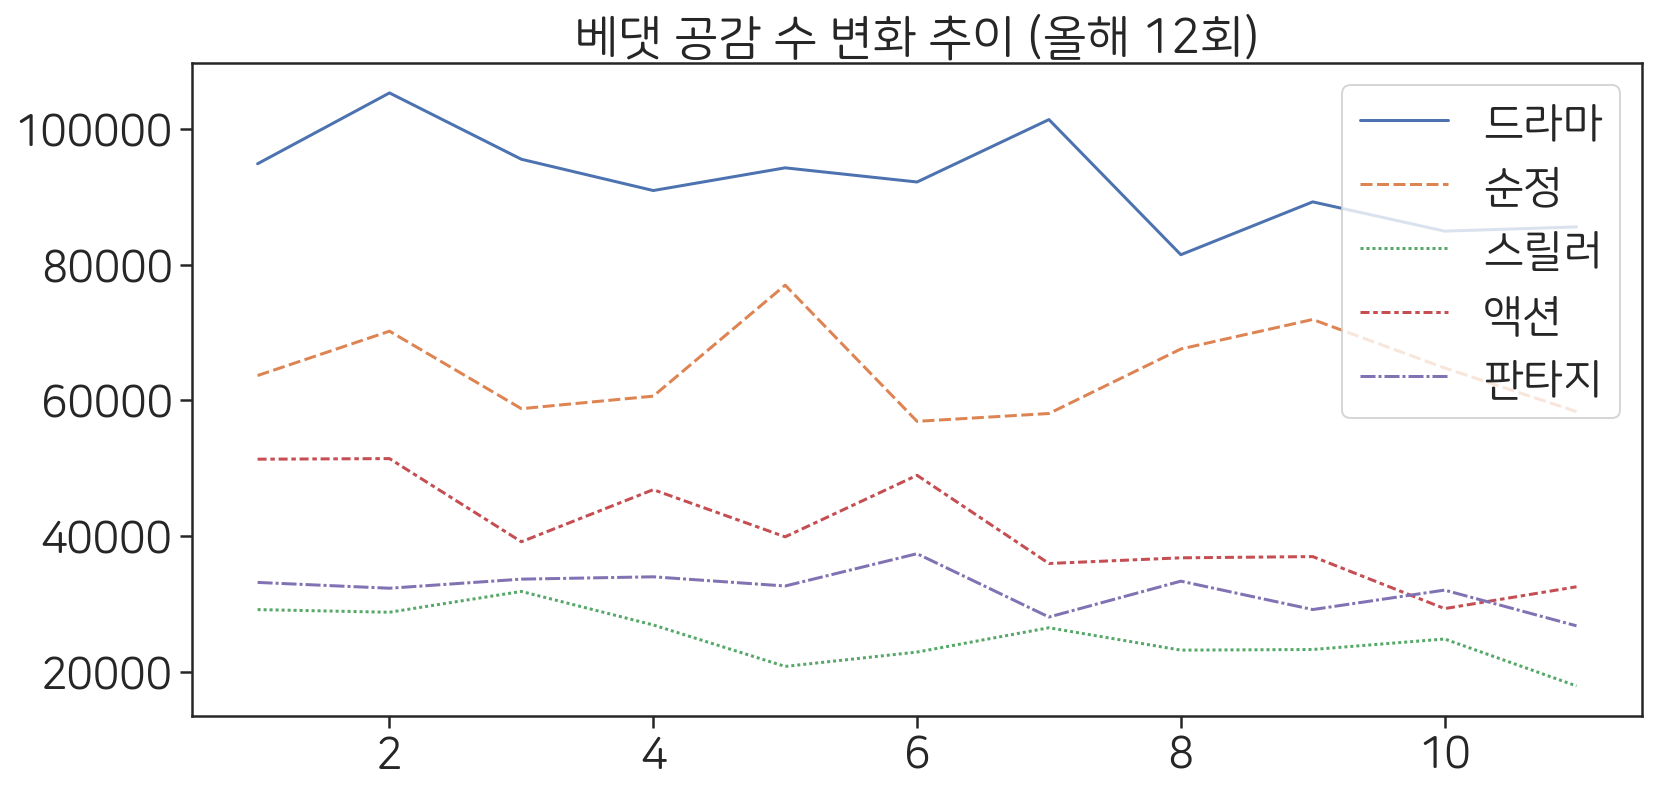

In [ ]:
#@title
rcParams['figure.figsize'] = 13, 6 # 플랏 크기 조절
rcParams['font.size'] = '18' # 폰트 크기 조절
cond = thisYearPlot['종류'] == '베댓공감수'
plot = thisYearPlot[cond].reindex([i for i in range(1,53)])
fig = sns.lineplot(data=plot)
plt.title("베댓 공감 수 변화 추이 (올해 12회)")
plt.xlabel("")
plt.ylabel("")
print()

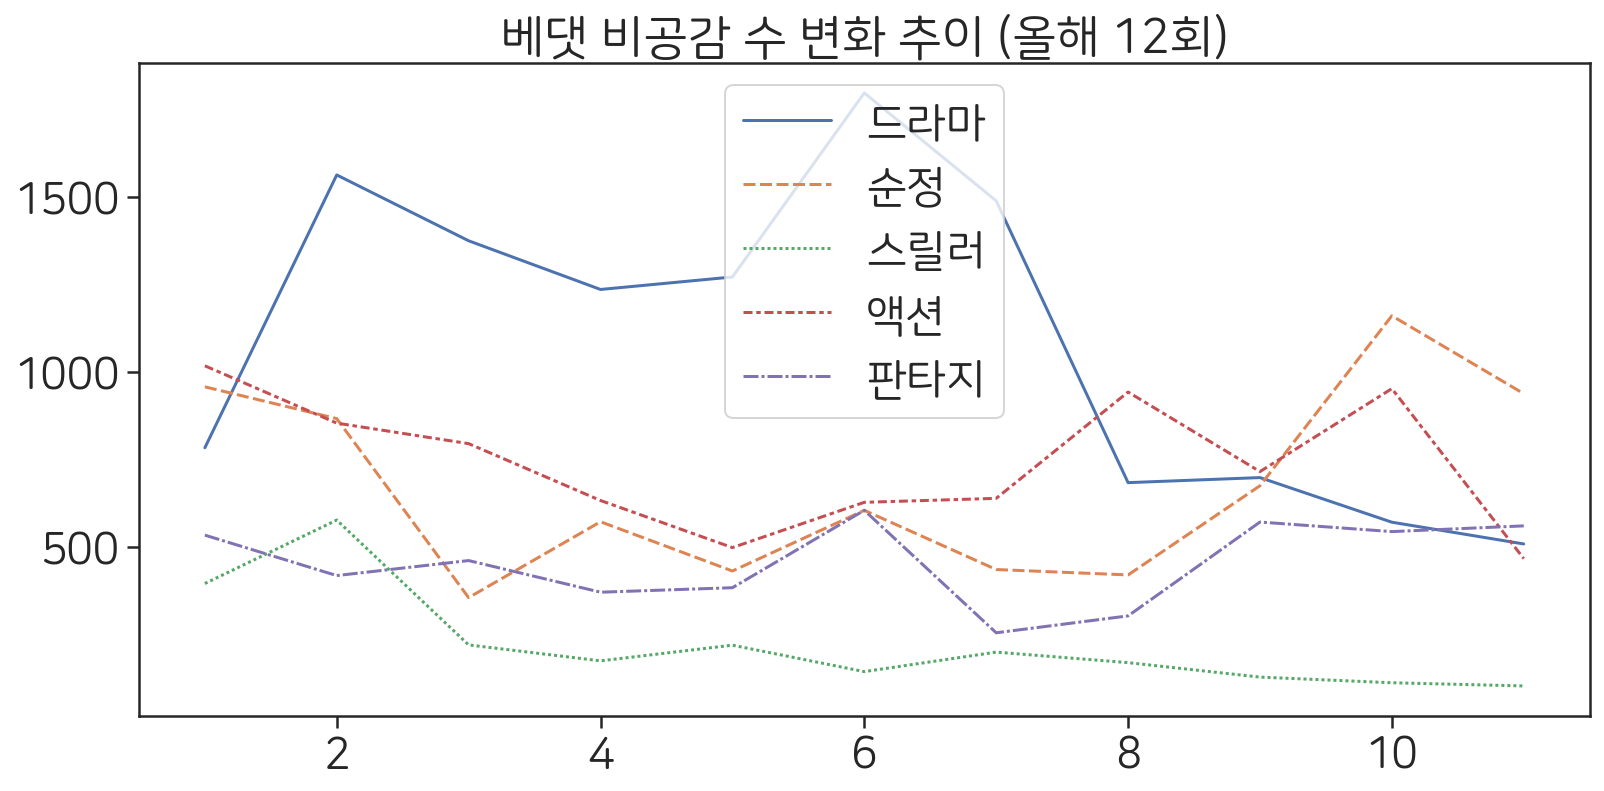

In [ ]:
#@title
rcParams['figure.figsize'] = 13, 6 # 플랏 크기 조절
rcParams['font.size'] = '18' # 폰트 크기 조절
cond = thisYearPlot['종류'] == '베댓비공감수'
plot = thisYearPlot[cond].reindex([i for i in range(1,53)])
fig = sns.lineplot(data=plot)
plt.title("베댓 비공감 수 변화 추이 (올해 12회)")
plt.xlabel("")
plt.ylabel("")
print()

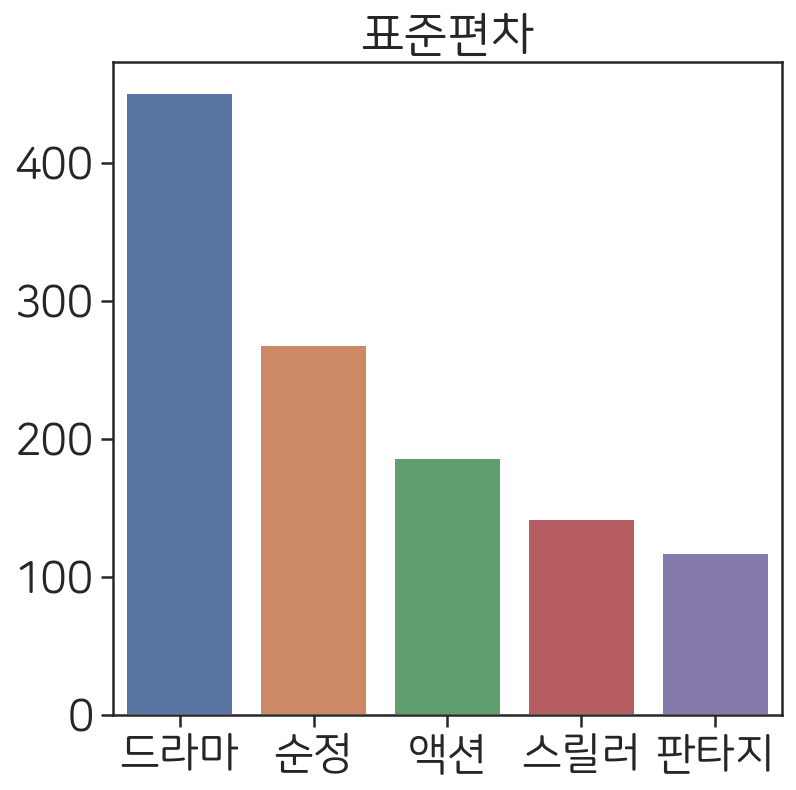

In [ ]:
#@title
rcParams['figure.figsize'] = 6, 6 # 플랏 크기 조절
rcParams['font.size'] = '18' # 폰트 크기 조절
plot = plot.std().to_frame().reset_index()
plot = plot.rename(columns={"index": "장르", 0: "표준편차"}).sort_values('표준편차', ascending=False)
fig = sns.barplot(data=plot, x=plot['장르'], y='표준편차')
plt.title("표준편차")
plt.xlabel("")
plt.ylabel("")
print()